In [ ]:
!pip install featuretools --upgrade

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
url = 'https://raw.githubusercontent.com/NevilleTeh/WIE3007_DMW/refs/heads/main/Data%20Science%20Salary%202021%20to%202023.csv'
import featuretools as ft

# **Load Dataset**

In [ ]:
df = pd.read_csv(url)

In [ ]:
# Display the first few rows of the dataset
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


**Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


**Statistics**

In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


**Check Columns**

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

**Check Missing Values**

In [ ]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0
company_size,0


**Standardizing Data Formats**

In [ ]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

In [ ]:
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [ ]:
#Replace values in Company size column
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

In [ ]:
#show the dataset top row result
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,Entry-Level,Full-Time,Applied Scientist,213660,USD,213660,US,Large
1,2023,Entry-Level,Full-Time,Applied Scientist,130760,USD,130760,US,Large
2,2023,Entry-Level,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Large
3,2023,Entry-Level,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Large
4,2023,Entry-Level,Full-Time,Applied Scientist,204620,USD,204620,US,Large


**Handling outliers**

In [ ]:
# Handle missing values by filling them with the median of the numeric columns and mode of the categorical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# Detect and handle outliers using Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
outliers_df = df[outliers]

In [ ]:
# Calculate statistics for the numeric columns
salary_stats = df['salary_in_usd'].describe()

In [ ]:
# Calculate IQR, upper limit, and lower limit for each numeric column
IQR = salary_stats['75%'] - salary_stats['25%']
upper_limit = salary_stats['75%'] + 1.5 * IQR
lower_limit = salary_stats['25%'] - 1.5 * IQR

In [ ]:
# Create a DataFrame to display the statistics with no decimal places
stats_df = pd.DataFrame({
    'Statistic': ['Min', 'Q1 (25%)', 'Median (50%)', 'Q3 (75%)', 'Max', 'Mean', 'IQR', 'Upper Limit', 'Lower Limit'],
    'Value': [int(salary_stats['min']), int(salary_stats['25%']), int(salary_stats['50%']), int(salary_stats['75%']), int(salary_stats['max']), int(salary_stats['mean']), int(IQR), int(upper_limit), int(lower_limit)]
})

from tabulate import tabulate
# Display the statistics in a proper table
print(tabulate(stats_df, headers='keys', tablefmt='grid', showindex=False))

+--------------+---------+
| Statistic    |   Value |
+==============+=========+
| Min          |    5132 |
+--------------+---------+
| Q1 (25%)     |   95000 |
+--------------+---------+
| Median (50%) |  135000 |
+--------------+---------+
| Q3 (75%)     |  175000 |
+--------------+---------+
| Max          |  450000 |
+--------------+---------+
| Mean         |  137555 |
+--------------+---------+
| IQR          |   80000 |
+--------------+---------+
| Upper Limit  |  295000 |
+--------------+---------+
| Lower Limit  |  -25000 |
+--------------+---------+


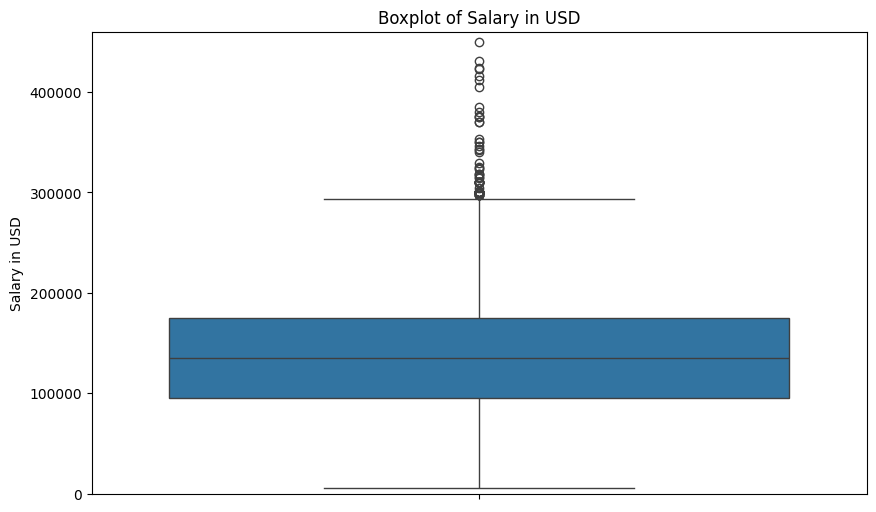

In [ ]:
# Visualize outliers using boxplots for numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.ylabel('Salary in USD')
plt.ylim(0, df['salary_in_usd'].max() + 10000)  # Set y-axis limit for consistency
plt.show()

**One-Hot Encoding**

In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'company_size'])

**Feature Engineering**

In [ ]:
# Use Featuretools for automated feature engineering
es = ft.EntitySet(id="salary_data")
es = es.add_dataframe(dataframe_name="salaries", dataframe=df_encoded, index="index")

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="salaries")

In [ ]:
# Display the feature matrix
display(feature_matrix.head())

,work_year,job_title,salary,salary_currency,salary_in_usd,company_location,experience_level_Entry-Level,experience_level_Experienced,experience_level_Mid-Level,experience_level_Senior,employment_type_Contractor,employment_type_Freelancer,employment_type_Full-Time,employment_type_Part-Time,company_size_Large,company_size_Medium,company_size_Small
index,,,,,,,,,,,,,,,,,
0,2023,Applied Scientist,213660,USD,213660,US,True,False,False,False,False,False,True,False,True,False,False
1,2023,Applied Scientist,130760,USD,130760,US,True,False,False,False,False,False,True,False,True,False,False
2,2023,Data Quality Analyst,100000,USD,100000,NG,True,False,False,False,False,False,True,False,True,False,False
3,2023,Compliance Data Analyst,30000,USD,30000,NG,True,False,False,False,False,False,True,False,True,False,False
4,2023,Applied Scientist,204620,USD,204620,US,True,False,False,False,False,False,True,False,True,False,False


# **DS Salary Trends (2020-2023)**

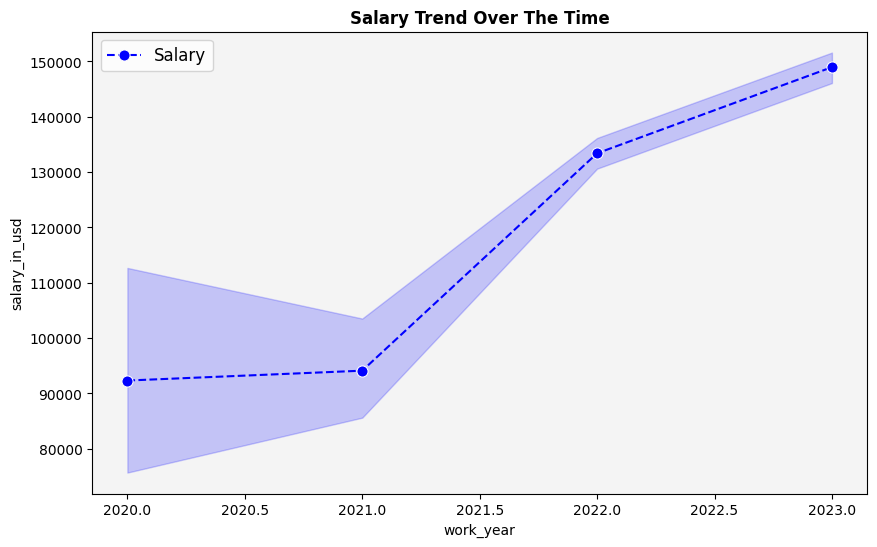

In [ ]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

Insights:
- There wasn't much change in salary from 2020 to 2021
- Continual changes occurred in salary from 2021-2022
- The progress in salary from 2022 to 2023 followed a similar pattern

**Salary Trend Over Time by Company Size**

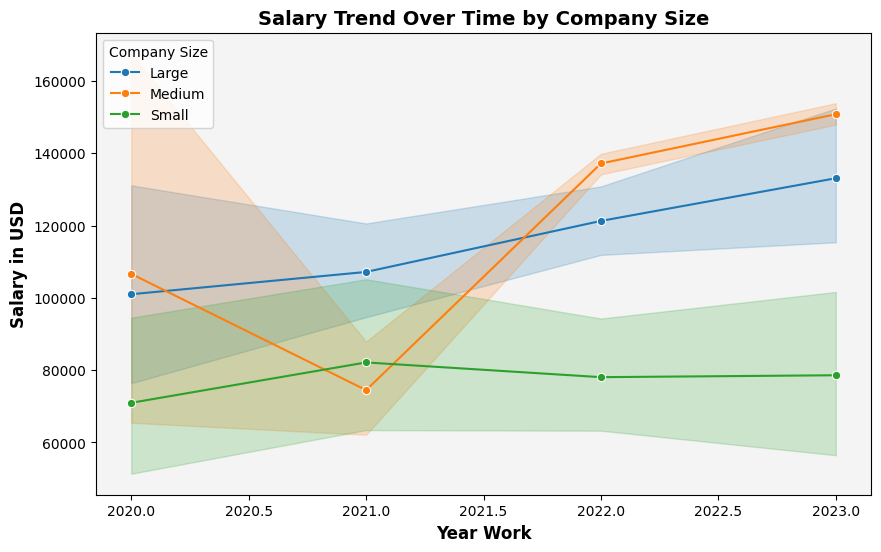

In [ ]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

Insight:
- The salary trend in medium-sized companies is increasing compared to small and large companies.
- The salary line in large companies is not fluctuating as much as in medium-sized companies.

**Average Salary by Experience Level**

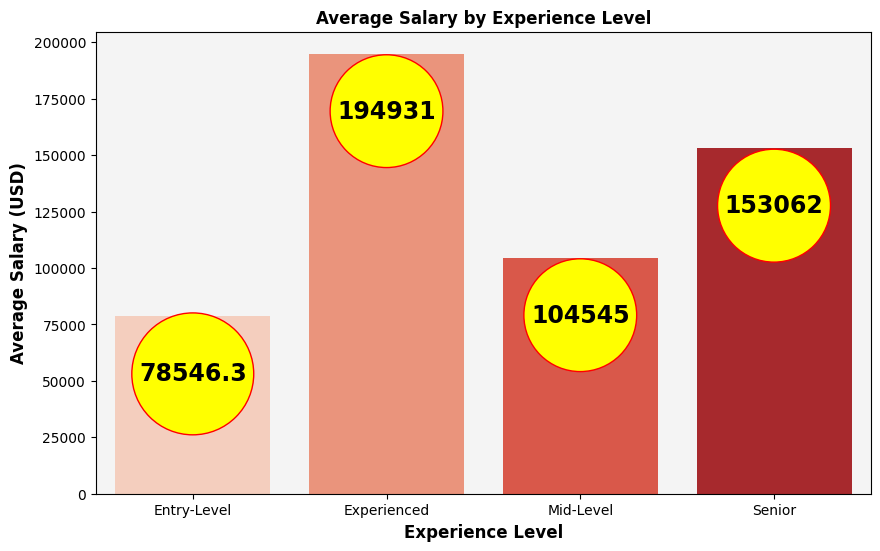

In [ ]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'


                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

Insights:
- Experienced professionals earn the highest salary at approximately 194,931 USD.
- Seniors also receive a competitive average salary of about 153,062 USD.
- Mid-level employees have an average salary of around 104,545 USD.
- Entry-level positions offer a lower average salary, at approximately 78,546 USD.

**Average Salary by Employment Type**

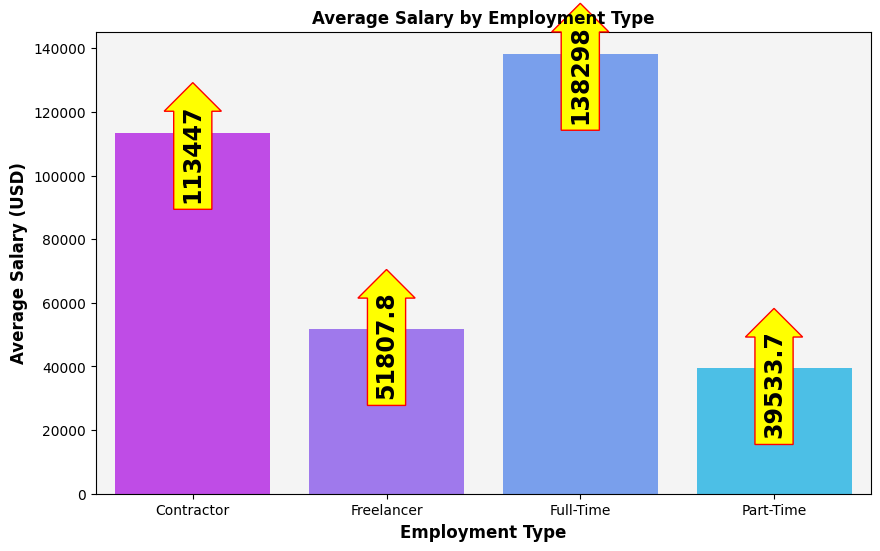

In [ ]:
#Group data by 'employment_type' and calculate the average salary for each type
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'cool_r')
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90

                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()

Insights:
- Full-time employees have the highest average salary at approximately 138,298 USD.
- Contractors also earn a competitive average salary of about 113,447 USD.
- Freelancers and Part-time workers have lower average salaries, at around 51,808 USD and 39,534 USD.


**Average Salary by Job Title (TOP 10)**

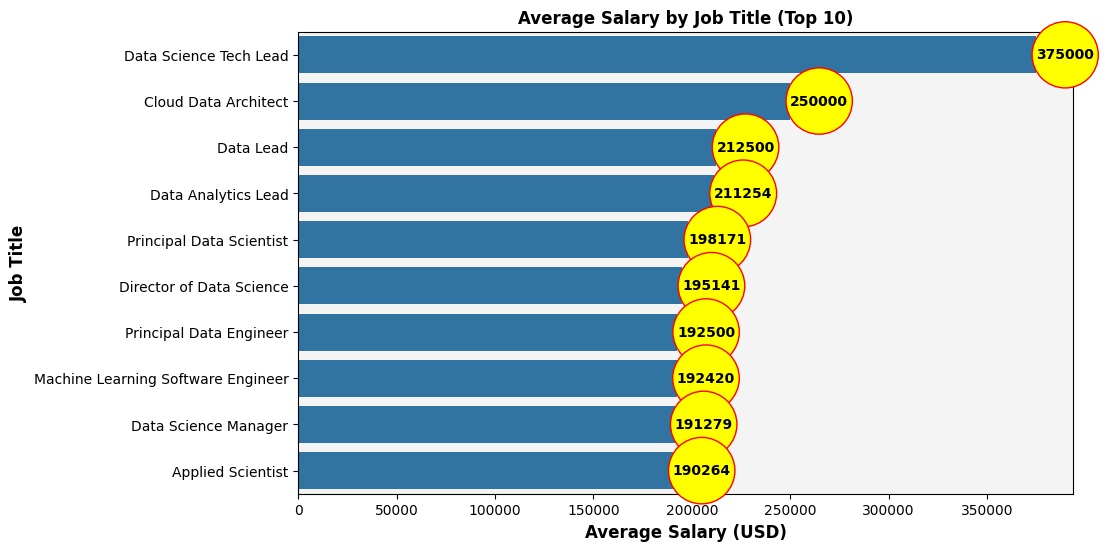

In [ ]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,

                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold'


               )
# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

Insights:
- Data Science Tech Lead has the highest average salary at 375,000 USD.
- Cloud Data Architect and Data Lead also have notably high salaries.
- The top 10 job titles exhibit strong earning potential in the data science field.

**Average Salary by Currency**

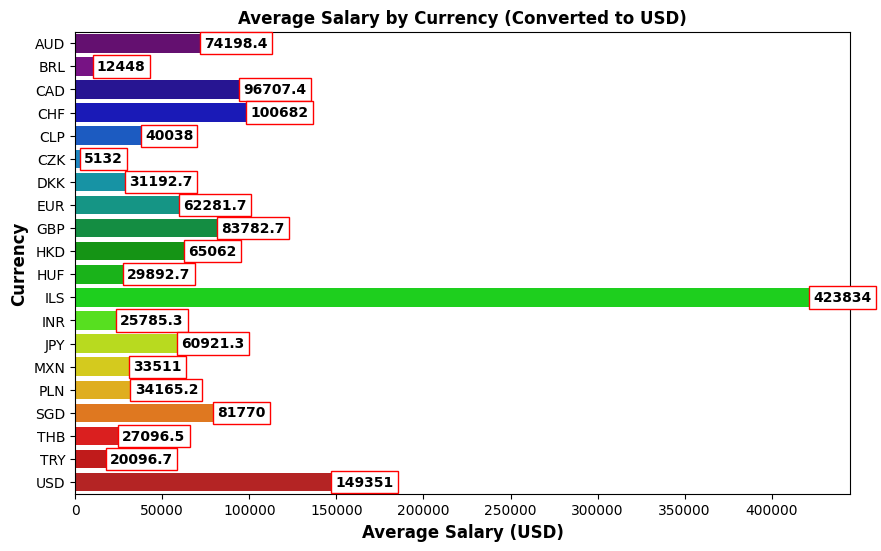

In [ ]:
# Group data by 'salary_currency' and calculate the average salary in USD for each currency
currency_salary  = df.groupby('salary_currency')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(x = currency_salary.values , y  = currency_salary.index, palette = 'nipy_spectral')
plt.title('Average Salary by Currency (Converted to USD)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Currency', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container,
                bbox = {'boxstyle': 'square', 'facecolor': 'white', 'edgecolor': 'red'},
                fontweight = 'bold'


               )
# Customize the background color
plt.show()

Insights:
- Employees receiving salaries in USD have the highest average salary at approximately 149,351 USD.
- Salaries in ILS (Israeli Shekel) are notably high, with an average of 423,834 USD.
- GBP (British Pound) and CHF (Swiss Franc) also offer competitive average salaries.
- Other currencies vary in average salaries, with AUD (Australian Dollar) and BRL (Brazilian Real) being among the lowest.

**Average Data Science Salaries by Location**

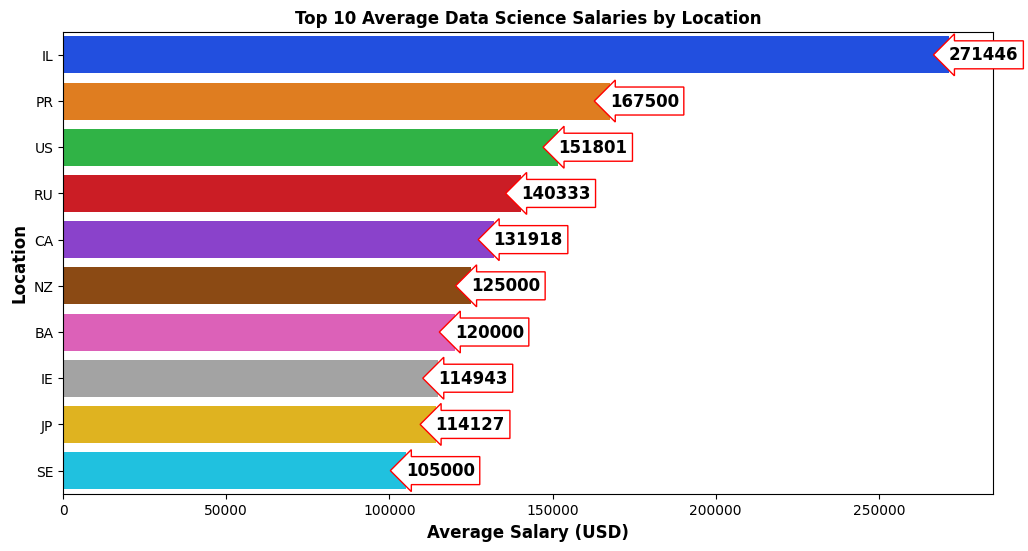

In [ ]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
ax.set_facecolor("#f4f4f4")
plt.show()

Insights:
- In Illinois (IL), the average data science salary is notably high, at approximately 271,447 USD.
- Puerto Rico (PR) and the United States (US) also offer competitive average salaries, with approximately 167,500 USD and 151,801 USD, respectively.
- Russia (RU) and Canada (CA) have average data science salaries of around 140,333 USD and 131,918 USD, respectively.
- New Zealand (NZ), Bosnia and Herzegovina (BA), Ireland (IE), Japan (JP), and Sweden (SE) round out the top locations with varying average salaries.

**Average Salary by Company Size**

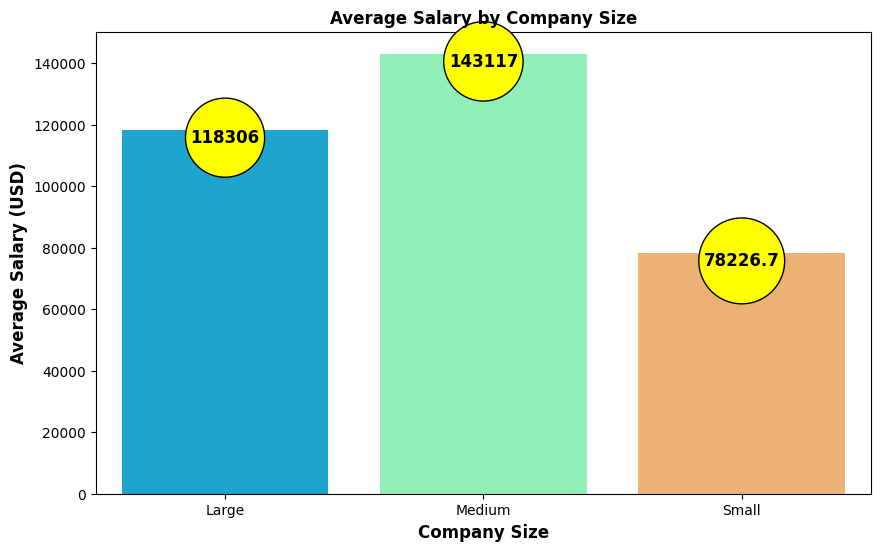

In [ ]:
# Group data by 'company_size' and calculate the average salary for each size
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean()

# Plot the average salary by company size
plt.figure(figsize=(10, 6))
p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'rainbow')
plt.title('Average Salary by Company Size', fontsize=12, fontweight='bold')
plt.xlabel('Company Size',fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container, fontweight = 'bold',
                padding = -12,
                fontsize=12,
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'black'}

               )


plt.show()

Insights:
- Medium-sized companies offer the highest average salary at approximately 143,117 USD.
- Large companies follow with an average of about 118,306 USD.
- Small companies offer a lower average salary of around 78,227 USD.

**Salary Distribution for Data Science Professionals**

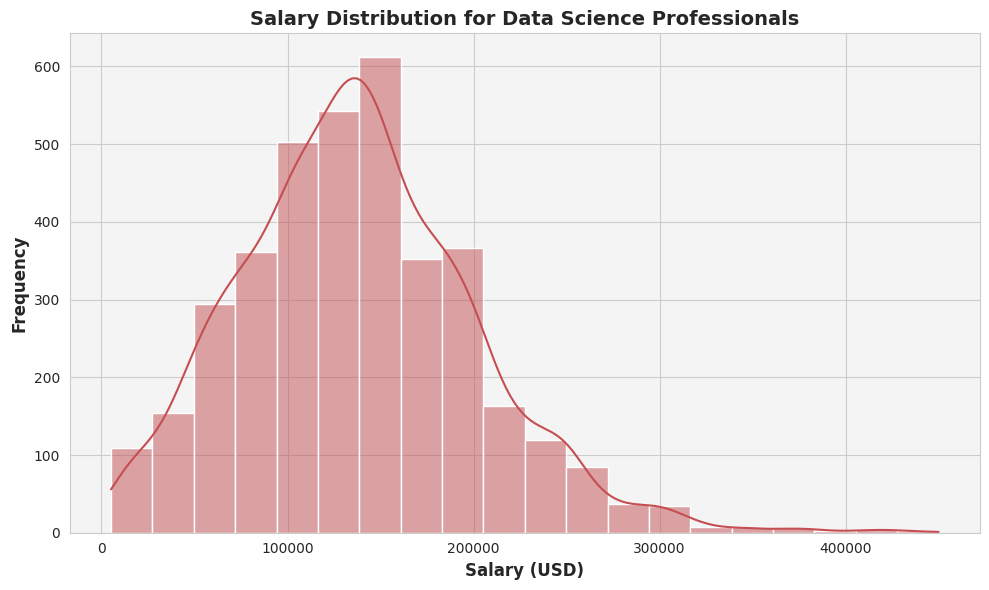

In [ ]:
# Set a custom style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Show the plot
plt.tight_layout()
plt.show()

Insights:
- The salary distribution for data science professionals is right-skewed, with a majority of professionals earning lower to mid-range salaries.
- A noticeable peak in the distribution suggests a concentration of professionals within a specific salary range.
- The KDE (Kernel Density Estimate) curve provides a smooth estimate of the distribution, showing a prominent peak.

**Job Title Recommendation**

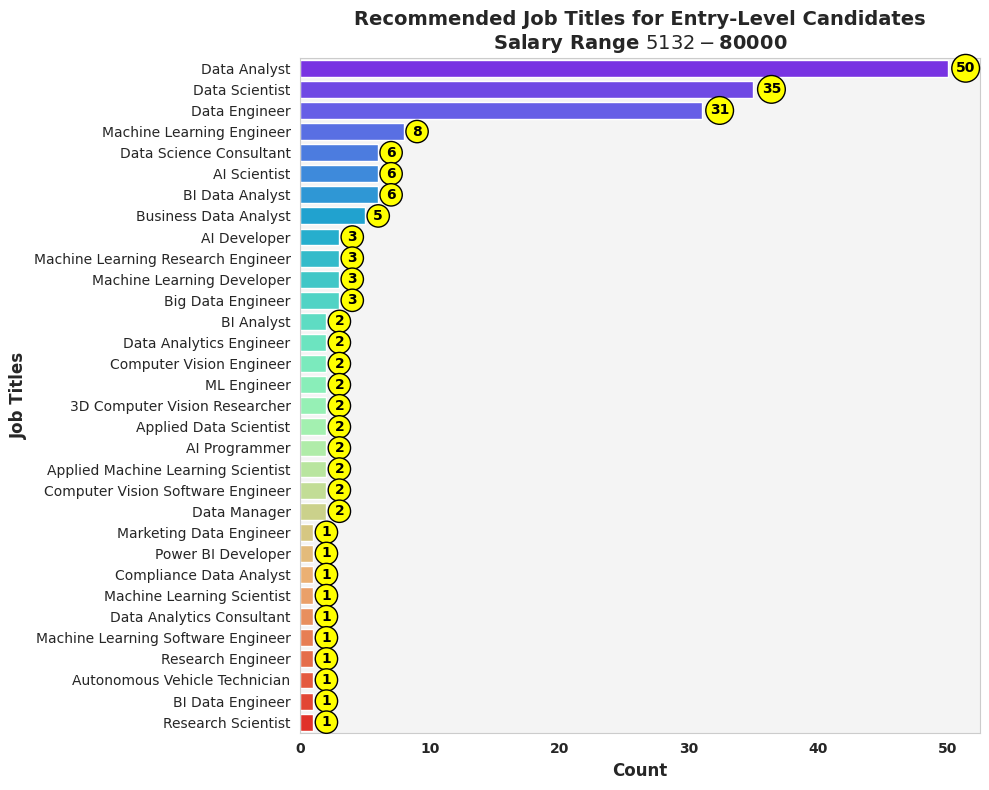

In [ ]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5132, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))



ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,
                 bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()

Insights:
For Entry-Level candidates seeking a salary range between 5,132 to 80,000 USD, the top recommended job titles are:

- Data Analyst (50 job openings)
- Data Scientist (35 job openings)
- Data Engineer (31 job openings)

**Average Salary by Experience Level and Employment Type**

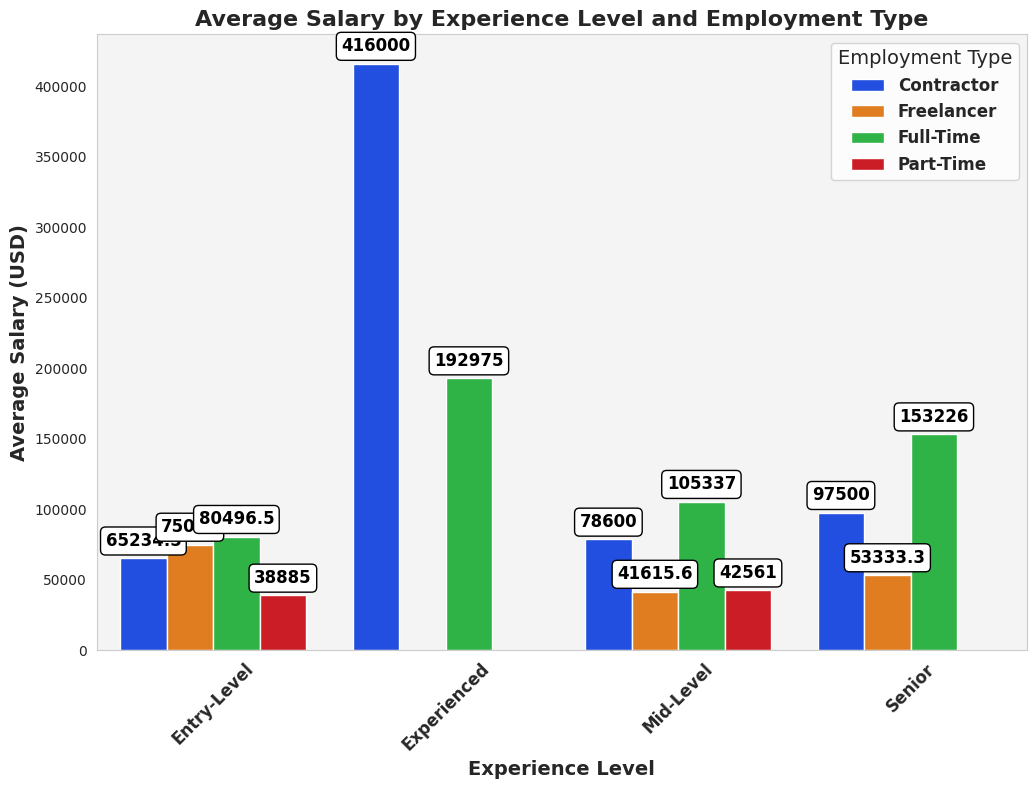

In [ ]:
# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()

Insights:
Best Employment Type and Experience Level for Maximum Cost-Effectiveness:

- Experience Level: Experienced
- Employment Type: Contractor
- Average Salary (USD): 416,000.0

**Average Salary by Company Location and Company Size**

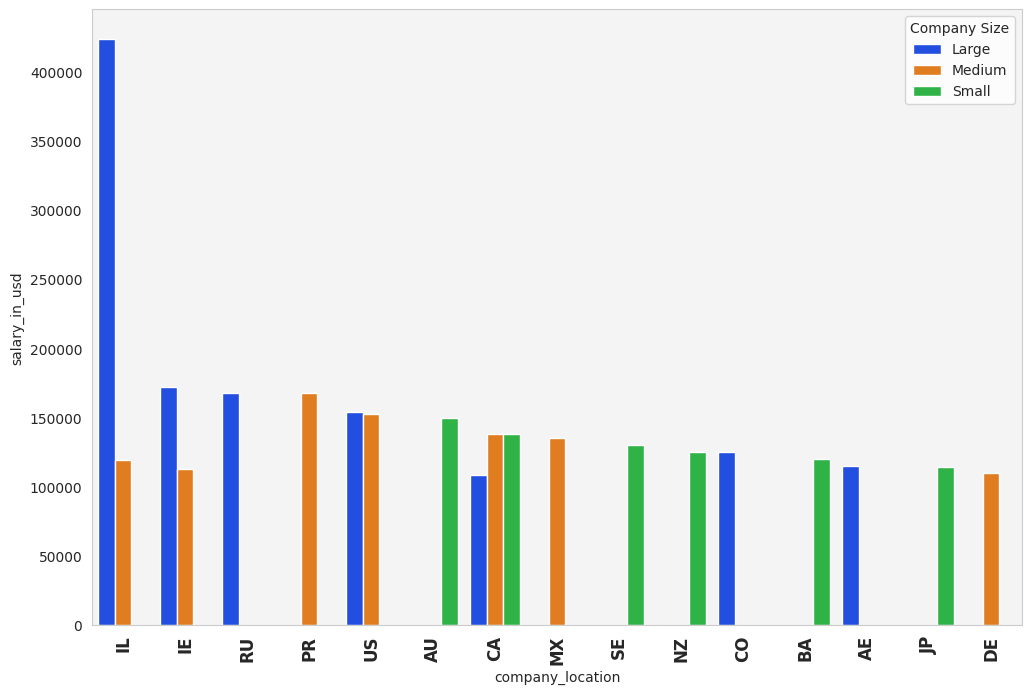

In [ ]:
cost_effectiveness = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().reset_index().sort_values(by = 'salary_in_usd', ascending = False)[:20]

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='company_location', y='salary_in_usd', hue='company_size', data=cost_effectiveness)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')


lg = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')


# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()

Insights:
In Illinois (IL), large companies tend to offer an average salary of $423,834 USD, meeting cost-effectiveness criteria.

**Count Plot for Experience Level and Employment Type etc**

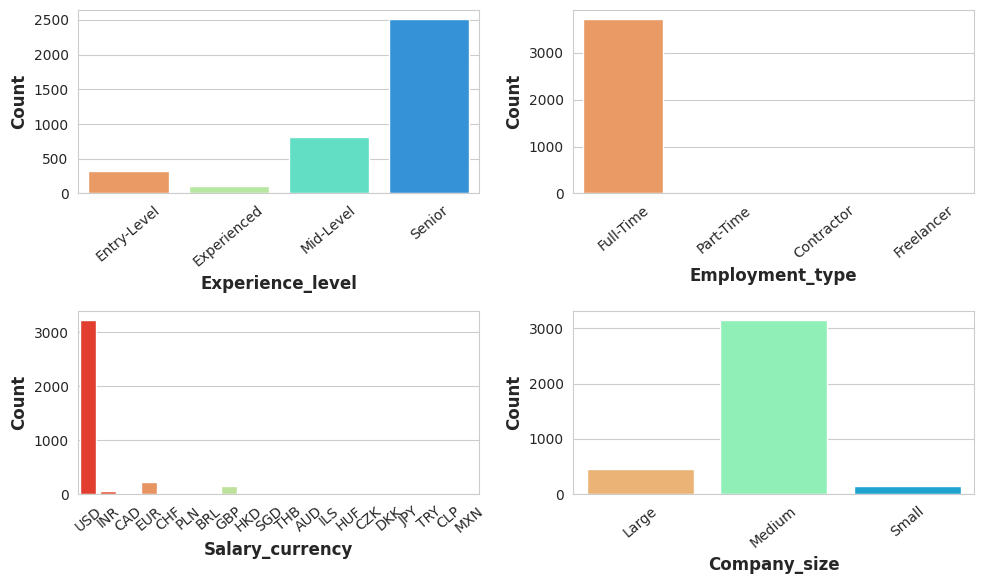

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

columns = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
axis = axis.flatten()
for i, col in enumerate(columns):
    p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)
    axis[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
    axis[i].set_ylabel('Count', fontsize=12, fontweight='bold')

# Remove any remaining empty subplots
for j in range(len(columns), len(axis)):
    fig.delaxes(axis[j])


plt.tight_layout()
plt.show()

Insights:
- Most common experience level: "Senior" (2518 counts).
- Most common employment type: "Full-Time" (3724 counts).
- Majority of salaries in USD (3229 counts).
- Most prevalent company size: "Medium" (3157 counts).

**Conclusion:**

Salary trends:

- Minimal change in 2020-2021.
- Continued fluctuations in 2021-2022.
- Similar pattern in 2022-2023.

Company size impact:

- Medium companies see salary growth.
- Large companies have stable salaries.

Experience level:

- Experienced pros earn most.
- Seniors follow, then mid-level, and entry-level.

Employment types:

- Full-Time has the highest average.
- Contractors also earn well.
- Freelancers and part-timers earn less.

Top job titles:

- Data Science Tech Lead earns the most.

Currency-based salaries:

- USD salaries are highest.
- ILS, GBP, and CHF follow.

Top locations:

- Illinois offers the highest salaries.

Company size impact:

- Medium companies pay the most.

Salary distribution:

- Right-skewed with a peak.

Entry-level job titles:

- Data Analyst, Data Scientist, Data Engineer.

Cost-effective choice:

- Experienced contractors earn 416,000 USD.

Common insights:

- "Senior" is the most common experience level.
- "Full-Time" is the most common employment type.
- Majority earn salaries in USD.
- "Medium" companies are prevalent.

In [ ]:
df.to_excel("cleaned_data.xlsx", index=False)

# Converting Dataset

Determine numerical and categorical columns

In [ ]:
#find out whether the column is numerical or categorical
numerical_cols = list(df._get_numeric_data().columns)
print('Numerical columns:')
print(numerical_cols)
print('')
categorical_cols = list(set(df.columns) - set(numerical_cols))
print('Categorical columns:')
print(categorical_cols)

Numerical columns:
['work_year', 'salary', 'salary_in_usd']

Categorical columns:
['salary_currency', 'company_size', 'company_location', 'employment_type', 'job_title', 'experience_level']


Converting categorical data into numerical data by using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#experience_level
le = LabelEncoder()
df['le_explvl'] = le.fit_transform(df['experience_level'])
df['le_explvl'].unique()

array([0, 1, 2, 3])

In [ ]:
#job_title
df['le_jobtitle'] = le.fit_transform(df['job_title'])
df['le_jobtitle'].unique()

array([ 8, 41, 22, 69, 89, 33, 25, 47, 13, 88, 17,  9,  7,  2,  1, 23, 14,
       16, 51, 58,  4, 31, 53, 59, 29, 66,  6,  5, 55, 49, 62, 37, 74, 67,
       57, 90, 45, 42, 70, 61,  3, 34, 44, 86, 28, 72, 84, 38, 18, 50, 32,
       73, 21, 40, 52, 11, 30, 12, 75, 15, 24, 10, 35, 43, 79, 68, 27, 26,
        0, 63, 60, 48, 64, 54, 81, 76, 85, 36, 46, 20, 39, 77, 87, 82, 71,
       65, 78, 80, 19, 83, 92, 56, 91])

In [ ]:
#company_size
df['le_compsize'] = le.fit_transform(df['company_size'])
df['le_compsize'].unique()

array([0, 1, 2])

In [ ]:
#employment_type
df['le_emptype'] = le.fit_transform(df['employment_type'])
df['le_emptype'].unique()

array([2, 3, 0, 1])

In [ ]:
#company_location
df['le_comploc'] = le.fit_transform(df['company_location'])
df['le_comploc'].unique()

array([70, 53, 38, 12, 25, 29, 20, 14,  6, 63, 10, 28, 71,  7, 30, 31, 54,
       26, 36, 64, 65, 51, 27, 33,  2, 43, 61, 67, 13, 69, 37, 17, 60, 23,
       46, 49, 57, 41, 47,  3, 18, 40, 34,  4,  8,  5, 35, 45, 52, 19, 22,
       62, 58, 44, 68,  9, 24,  1, 66, 59,  0, 21, 39, 16, 11, 42, 15, 48,
       50, 56, 32, 55])

# Splitting Dataset

In [ ]:
#removed 'salary_currecy' and 'salary' as already converted into 'salary_in_usd'
#removed 'experience_level', 'job_title'
data_df = df
y = data_df['salary_in_usd']
x = data_df.drop(['salary_in_usd', 'salary', 'salary_currency', 'experience_level', 'job_title', 'company_size', 'employment_type', 'company_location'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Engineering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Feature Engineering: Dimensionality Reduction and Selection
feature_selection = True  # Set to True to apply feature selection
pca_reduction = True  # Set to True to apply PCA

if feature_selection:
    selector = SelectKBest(score_func=f_regression, k=min(10, x_train.shape[1]))
    x_train = selector.fit_transform(x_train, y_train)
    x_test = selector.transform(x_test)

if pca_reduction:
    pca = PCA(n_components=min(10, x_train.shape[1]))
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)

# Standard Approach Model Training with cross-validation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor()
}

In [ ]:
results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = {
        "CV RMSE": np.sqrt(-cv_scores.mean()),
        "CV StdDev": np.sqrt(cv_scores.std())
    }
    model.fit(x_train, y_train)

# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
#     results[name] = {"RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T
print("Cross-Validation Results:")
print(results_df)

Cross-Validation Results:
                        CV RMSE     CV StdDev
Linear Regression  55020.912899  11209.804279
Decision Tree      56683.310494  11180.577240
Random Forest      51501.913632   6469.036312
Gradient Boosting  51002.437906   7110.327504
XGBoost            53268.972932   8318.849341


# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
metrics = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    metrics.append({"Model": name, "MSE": mse, "MAE": mae,"RMSE": rmse, "R2": r2})

metrics_df = pd.DataFrame(metrics)
print("Evaluation Metrics:")
print(metrics_df)

Evaluation Metrics:
               Model           MSE           MAE          RMSE        R2
0  Linear Regression  2.943209e+09  40877.136403  54251.352350  0.266044
1      Decision Tree  2.825339e+09  38390.377629  53153.915404  0.295438
2      Random Forest  2.469258e+09  36436.905609  49691.629473  0.384234
3  Gradient Boosting  2.570394e+09  37354.212619  50699.057653  0.359014
4            XGBoost  2.498432e+09  37070.221787  49984.317303  0.376959


In [ ]:
# Sort the models based on your preferred metric, e.g., RMSE or R²
best_model_by_mse = metrics_df.sort_values('MSE').iloc[0]
best_model_by_mae = metrics_df.sort_values('MAE').iloc[0]
best_model_by_rmse = metrics_df.sort_values('RMSE').iloc[0]
best_model_by_r2 = metrics_df.sort_values('R2', ascending=False).iloc[0]

print(f"Best model by MSE: {best_model_by_rmse['Model']}")
print(f"Best model by MAE: {best_model_by_rmse['Model']}")
print(f"Best model by RMSE: {best_model_by_rmse['Model']}")
print(f"Best model by R2: {best_model_by_r2['Model']}")

Best model by MSE: Random Forest
Best model by MAE: Random Forest
Best model by RMSE: Random Forest
Best model by R2: Random Forest


# AutoML Model Training

TPOT

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTRegressor

model = TPOTRegressor(verbosity=2, generations=5, population_size=20)
model.fit(x_train, y_train)

print(f"Best Model: {model.fitted_pipeline_}")

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2555331272.0426598

Generation 2 - Current best internal CV score: -2555331272.0426598

Generation 3 - Current best internal CV score: -2530014859.368595

Generation 4 - Current best internal CV score: -2530014859.368595

Generation 5 - Current best internal CV score: -2530014859.368595

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=5, min_samples_split=16, n_estimators=100)
Best Model: Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_features=0.8500000000000001,
                                       min_samples_leaf=5,
                                       min_samples_split=16))])


# Model Interpretation

Feature Importance

Random Forest Feature Importance:
       Feature  Importance
1    le_explvl    0.431396
2  le_jobtitle    0.208851
0    work_year    0.133208
5   le_comploc    0.079333
4   le_emptype    0.075707
3  le_compsize    0.071505


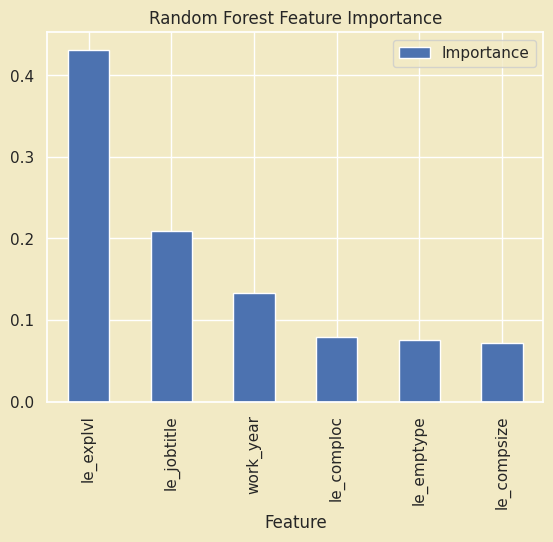

In [ ]:
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": x.columns[:len(importances)],
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("Random Forest Feature Importance:")
    print(feature_importance_df)
    feature_importance_df.set_index("Feature").plot(kind="bar")
    plt.title("Random Forest Feature Importance")
    plt.show()

Decision Tree Feature Importance:
       Feature  Importance
1    le_explvl    0.395292
2  le_jobtitle    0.257116
0    work_year    0.121283
4   le_emptype    0.079461
5   le_comploc    0.074178
3  le_compsize    0.072671


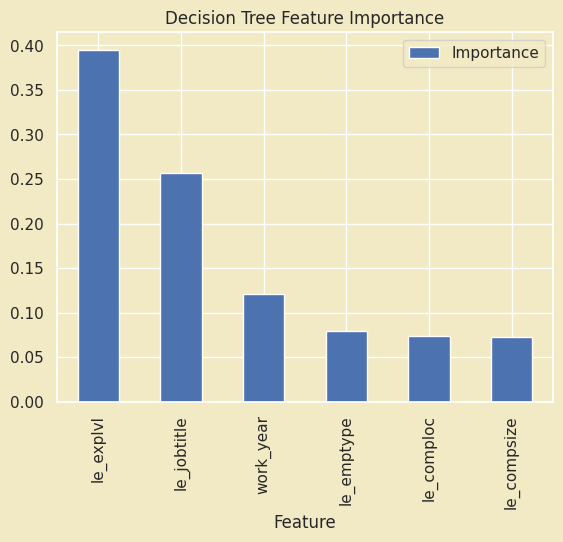

In [ ]:
if "Decision Tree" in models:
    dt_model = models["Decision Tree"]
    importances = dt_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": x.columns[:len(importances)],
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("Decision Tree Feature Importance:")
    print(feature_importance_df)
    feature_importance_df.set_index("Feature").plot(kind="bar")
    plt.title("Decision Tree Feature Importance")
    plt.show()

SHAP Interpretability

SHAP Summary Plot:


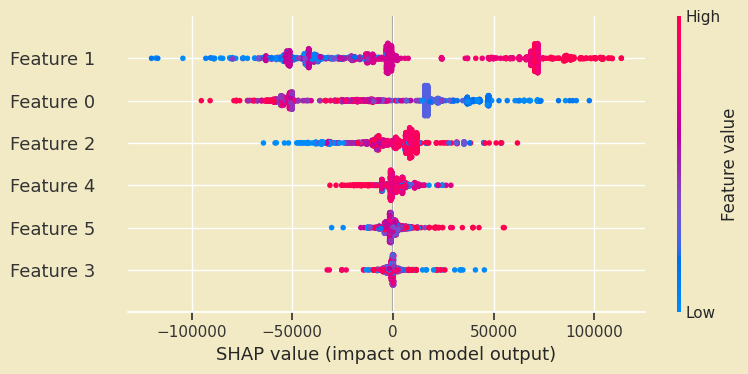

In [ ]:
import shap
if "XGBoost" in models:
    xgb_model = models["XGBoost"]
    explainer = shap.Explainer(xgb_model, x_test)
    shap_values = explainer(x_test)

    print("SHAP Summary Plot:")
    shap.summary_plot(shap_values, x_test)
    plt.show()